In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 各入力ベクトルを宣言
x_1 = np.matrix([[0], [0]])
x_2 = np.matrix([[0], [1]])
x_3 = np.matrix([[1], [0]])
x_4 = np.matrix([[1], [1]])
X = [x_1, x_2, x_3, x_4]

# パラメータの宣言
t_1 = 0
t_2 = 1
t_3 = 1
t_4 = 0
T = [t_1, t_2, t_3, t_4]

# 感覚層と連合層の結合重みの初期値
w_init = np.matrix([[1, -1], [-1, 1], [-1, -1], [1, 1]])
Weight_sen_uni = [w_init]

# 連合層と反応層の結合重み
Weight_uni_rea = [np.matrix([[0], [0], [0], [0]])]

# 連合層の出力
Y = []

# 反応層の出力記録
Z = []

# 学習率
a = 1

# 繰り返し処理を行う回数
REPEAT = 40

In [3]:
Weight_uni_rea[0].shape

(4, 1)

In [4]:
Weight_sen_uni[0].shape

(4, 2)

In [5]:
X[0].shape

(2, 1)

In [6]:
Wk = []

for i in X:
    wk = Weight_sen_uni[0] * i
    Wk.append(wk)

for i in Wk:
    print(i)

[[0]
 [0]
 [0]
 [0]]
[[-1]
 [ 1]
 [-1]
 [ 1]]
[[ 1]
 [-1]
 [-1]
 [ 1]]
[[ 0]
 [ 0]
 [-2]
 [ 2]]


In [7]:
Wk[0].shape

(4, 1)

In [8]:
type(Wk[1][0])

numpy.matrix

In [9]:
bool(Wk[0][0] < 0)

False

In [10]:
# 連合層の出力
for i in range(REPEAT):
    for j in range(len(Wk[i % len(Wk)])):
        if Wk[i % len(Wk)][j] > 0:
            Wk[i % len(Wk)][j] = 1
        else:
            Wk[i % len(Wk)][j] = 0
    Y.append(Wk[i % len(Wk)])

In [11]:
# 連合層と反応層の結合重みを更新
for i in range(len(Y)):
    if Weight_uni_rea[i].T * Y[i] > 0:
        Z.append(1)
    else:
        Z.append(0)
    w = Weight_uni_rea[i] - a * (Z[i] - T[i % len(T)]) * Y[i]
    Weight_uni_rea.append(w)

In [46]:
Weight_uni_rea[40][0]

matrix([[1]])

In [13]:
Weight_uni_rea_norm = []
for i in Weight_uni_rea:
    Weight_uni_rea_norm.append(np.linalg.norm(i))
Weight_uni_rea_norm

[0.0,
 0.0,
 1.4142135623730951,
 1.4142135623730951,
 1.0,
 1.0,
 1.0,
 1.7320508075688772,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951,
 1.4142135623730951]

In [14]:
Z

[0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


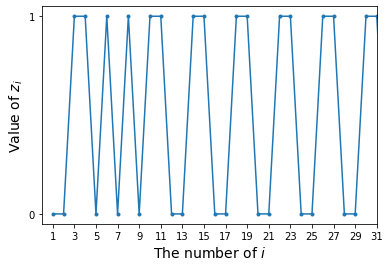

In [41]:
# 反応層の出力結果
x_count = []
for i in range(len(Z)):
    x_count.append(i + 1)
print(x_count)
plt.plot(x_count, Z, marker='.')
plt.xticks(np.arange(1, len(x_count) + 1, 2))
plt.yticks(np.arange(0, 1.2, 1))
plt.xlim(0,31)
plt.xlabel("The number of $i$", size=14)
plt.ylabel("Value of $z_{i}$", size=14)
plt.show()

In [54]:
w1 = []
w2 = []
w3 = []
w4 = []
x_count = []

for i in range(len(Weight_uni_rea)):
    w1.append(int(Weight_uni_rea[i][0]))
    w2.append(int(Weight_uni_rea[i][1]))
    w3.append(int(Weight_uni_rea[i][2]))
    w4.append(int(Weight_uni_rea[i][3]))
    x_count.append(i)
print(len(w1))
print(len(x_count))

41
41


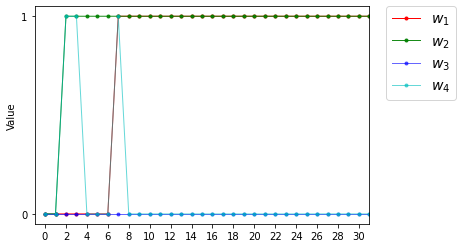

In [71]:
# 重みベクトルの推移
plt.plot(x_count, w1, linewidth=1, color='r', label='$w_{1}$', marker='.')
plt.plot(x_count, w2, linewidth=1, color='g', label='$w_{2}$', marker='.', alpha=0.9)
plt.plot(x_count, w3, linewidth=1, color='b', label='$w_{3}$', marker='.', alpha=0.6)
plt.plot(x_count, w4, linewidth=1, color='c', label='$w_{4}$', marker='.', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.xticks(np.arange(0, len(x_count) + 1, 2))
plt.yticks(np.arange(0, 2, 1))
plt.ylabel("Value")
plt.xlim(-1, 31)
plt.show()